<a href="https://colab.research.google.com/github/aidenaislinn/python-for-text-analysis/blob/master/NMCP_practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import norm
from math import exp,sqrt
import numpy as np
import pandas as pd
from matplotlib import cm

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import SVG

This practical assignment is composed of several parts, each of which has a number of separate questions. 

### NOTE
I have provided the answers to all of the questions but they are commented out in the markdown. Don't peek ahead!

# Part 1: Signal Detection Theory


In class, we briefly spoke about signal detection theory, which is a model that uses hit- and false alarm rates to  determine an underlying sensitivity and decision criterion. 
The equations were mentioned but in this assignment we will look at how derive these equations from the SDT framework.
To be clear, we are talking about the equation for the sensitivity:  

$$
	d' = Z(P_{hit}) - Z(P_{FA}))
$$
...and the equation for the decision criterion:
$$
	c = - \frac{Z(P_{hit}) + Z(P_{FA}))}{2}
$$

The SDT framework assumes that both signal and noise have a `signal strength` that is represented as  a normal distribution with the same shape. 
The detector sets a criterion $\beta$, and every trial where a strength is observed that is greater than $\beta$, the detector concludes that a signal was present.
The cause for errors (`false alarms` and `misses`) is that these distributions overlap to a certain extent. The more overlap, the more errors.

![](SDT_drawings.svg)

Parameter $d'$ indicates the distance between the signal- and noise distribution, which reflects the extent to which the observer can dissociate the signal from the noise -- i.e. sensitivity. 
This number is expressed in $z$, so that $d' = 1.5$ implies that the distributions are 1.5 standard deviations away from each other.

An unbiased detector would place $\beta$ right in between the two distributions of signal and noise. 
However, detectors are rarely unbiased, for various reasons. Instead, they have a displacement $c$, which can be positive (i.e. **less** inclined to decide `signal`) or negative (**more** so inclined).


### Some functionality:

signal detection theory calculation

In [ ]:
Z = norm.ppf     
# This function turns 'proportions' into z-scores:
# Z(.5) = 0.0
# Z(.75) = 0.674
# Z(.1581) = -1.0

def sdt(hit_rate, fa_rate):
    """
    This function takes a hit rate and a false alarm rate, and computes d_prime and c
    """
    out = dict()
    out['d_prime'] = Z(hit_rate) - Z(fa_rate)
    out['criterion'] = -(Z(hit_rate) + Z(fa_rate))/2
    return out

# Example:
# print sdt(hit_rate=.75, fa_rate=.1)

print(sdt(hit_rate=10/15, fa_rate=3/15))

# drawing of d' == 0
# drawing of d' == 1.0, c=0
# drawing of d' = 1.0, c = 0.25.

{'d_prime': 1.2723485328683717, 'criterion': 0.20544696713872837}


**And**, plotting Gaussians for your figures; you can use the code below as an example.

In [ ]:
def draw_gauss(m,  s, ax, c, label='', rnge=[-5,5]):
    """
    draws a gaussian at x, with sd s in the specified axis using color c
    """
    x = np.linspace(rnge[0], rnge[1], 1000)
    ax.plot(x, norm.pdf(x, loc=m, scale=s), c=c, label=label)

In [ ]:
# we define some parameters for our example plot using the above function
s = sqrt(2)
mean_diff = 2
criterion = 1.6

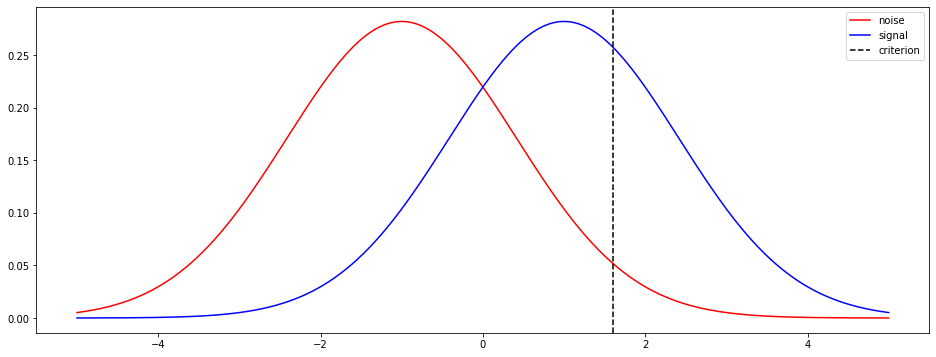

In [ ]:
# First of course make a figure
f, ax = plt.subplots(1, 1, figsize=(16,6))

# and then draw normal distributions
draw_gauss(m=-mean_diff/2, s=s, ax=ax, c='r', label='noise')
draw_gauss(m=mean_diff/2, s=s, ax=ax, c='b', label='signal')

# and, we can also plot 'c', the criterion value in the plot
ax.axvline(x=criterion,  color='k', linestyle='--', label='criterion') 
plt.legend();

## Questions on SDT

Answer these questions using separate code or markdown cells, depending on the question. If you want to explain yourself (or answer the questions using text), use a markdown cell for this. Example code and markdown cells are provided, and you can copy/paste those. 

1. With $d = 0$, there is no difference between the distributions of signal and noise. Make a drawing of this scenario. What is the expected proportion of hits and false alarms? Put these in the title of the figure using `ax.set_title('Hit Rate: , False Alarm Rate: ')`. You can check your answer with the function `sdt` defined above.

	*Answer* <!-- Here, the hit rate and the false alarm rate are equal; for every criterion, the amount of the Gaussian that falls over the criterion is the same for noise and signal trials. -->

2. Now make a drawing of the situation with $d' = 1.0, c = 0$. 
	What happens with the hit rate and the false alarm rate when d' is increased? What happens to the **difference**  between the hit rate and the false alarm rate? 

	*Answer* <!-- As we increase $d'$ in this case, both HR increases and FAR decreases, their difference increases.-->

3. Add a new line for a new $c$ (criterion) to your figure in the previous drawing, reflecting the scenario: $d' = 1.0, c = 0.25$. 
	What do you think this shift in $c$ does to $Z(P_{hit})$, and $Z(P_{FA})$ respectively?
	
	*Anwers* <!-- See above - it decreases both Z scores! -->
	
    You should now have a reasonable understanding of the formula for $d'$, and why its calculation does **not** depend on the bias (criterion) $c$ .
4. To gain a better understanding of the definition of $c$, have another look at the situation $d'$ = 1.0, $c$ = 0. How does $Z(P_{hit})$ relate to $Z(P_{FA})$, regardless of the value of $d'$ ?

	*Answer* <!-- One is (1-the other) -->

5. If $c$ decreases to -0.25, what happens to $Z(P_{hit})$? What happens to $Z(P_{FA})$?

	*Answer* <!-- decreasing c means more random samples fall above it, i.e. HR and FAR both increase. -->
	
    You should now have a reasonable understanding of the formula for $c$
6. Paul does an experiment where people see dynamic noise for 3s, and participants have to indicate whether they saw a '+' which appears on half of the trials. 
	In the first block, the '+' can appear anytime between $t=1000ms$ and $t=2500ms$.
    
	In another block of the experiment, Paul instructs the participants that the '+', when present, appears at $t=2000ms$ at every trial.
    
	Paul finds that participants are 81.3% accurate in the first block, and 92.4% accurate in the second block (t-test $p< 0.005$), and writes this result up in a paper titled *"Top-down controlled temporal attention impacts Visual Sensitivity"*. 
    
	Explain to Paul, in your own words, why his conclusions are premature.

	*Answer* <!-- The manipulation could have made people change their criterion, and this could have caused the observed pattern of results. This doesn't say anything about the actual visual sensitivity! -->

7. **BONUS** One of the critical assumptions of SDT is that the distributions of `signal` and `noise` have the same shape. 
	Give a reason, in your own words, why this assumption is often considered justified.
    
	*Answer* <!-- The distributions are gaussians because they arise from the combination of very many independent noise processes. It is not reasonable to assume that these noise processes change due to our signal being present or not.  -->

In [ ]:
#### EXAMPLE CODE CELL ####

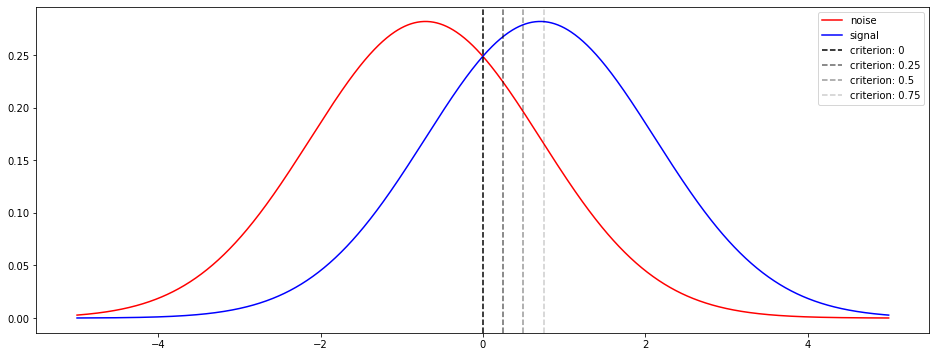

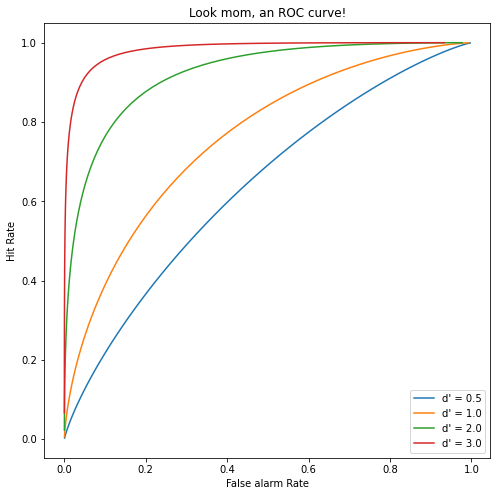

In [ ]:
##############################################################
## the folowing is helper code for the questions 2-4

# 1. make drawing of  $d=1$
# First of course make a figure
f, ax = plt.subplots(1, 1, figsize=(16,6))

# and then draw normal distributions
draw_gauss(m=-sqrt(2)/2, s=s, ax=ax, c='r', label='noise')
draw_gauss(m=sqrt(2)/2, s=s, ax=ax, c='b', label='signal')

# and, we can also plot 'c', the criterion value in the plot
ax.axvline(x=0,  color='k', linestyle='--', label='criterion: 0') 
ax.axvline(x=0.25,  color='k', linestyle='--', label='criterion: 0.25', alpha=0.6) 
ax.axvline(x=0.5,  color='k', linestyle='--', label='criterion: 0.5', alpha=0.4) 
ax.axvline(x=0.75,  color='k', linestyle='--', label='criterion: 0.75', alpha=0.2) 

plt.legend();



# We'll also perform the reverse calculation, 
# the one stated in the equations above.

def hr_far(d, c):
    fa = 1-norm.cdf(c, loc=-d/2)
    h = 1-norm.cdf(c, loc=d/2)
    return h, fa

cs = np.linspace(-3,3,100,endpoint=True)

f, ax = plt.subplots(1, 1, figsize=(8,8))
ax.set_title('Look mom, an ROC curve!')
ax.set_xlabel('False alarm Rate')
ax.set_ylabel('Hit Rate')

hs_fas = np.array([hr_far(0.5, c) for c in cs])
plt.plot(hs_fas[:,1], hs_fas[:,0], label="d' = 0.5")
hs_fas = np.array([hr_far(1.0, c) for c in cs])
plt.plot(hs_fas[:,1], hs_fas[:,0], label="d' = 1.0")
hs_fas = np.array([hr_far(2, c) for c in cs])
plt.plot(hs_fas[:,1], hs_fas[:,0], label="d' = 2.0")
hs_fas = np.array([hr_far(3.0, c) for c in cs])
plt.plot(hs_fas[:,1], hs_fas[:,0], label="d' = 3.0")

plt.legend();

# Part 2: Decision-making models

SDT is the backbone of decision-making and can explain a lot of the vagaries of human decisions. But some aspects are not covered by this simplest of models. Here, we will focus on one of these. In everyday life, evidence doesn't hit us instantaneously but rather, it takes a while to make your decision. This happens, for example, when the incoming information is noisy and we can afford the time to integrate this noisy evidence over time to improve our decision. 

So, evidence comes rolling in and your brain has to integrate this evidence. This involves retaining information by accumulating instantaneous inputs, and then comparing these accumulated traces with one another. That is, the decision variable that used to be a simple number now is an integral over time. This added complexity allows us to capture more possible behavioral scenarios. Models that do this are also called *Sequential Sampling Models*.

![](evidence_integration.svg)

There are many different models of this type of integration process, and we will treat a few of them here. We will use the different models to illustrate the choice scientists make when developing models, choices that have to do with the trade-off between simplicity and tractability on the one hand, and completeness on the other hand. 

## the fodder

In general, what we work with when we model decision-making is a sequence (distribution) of reaction times for both correct and error trials. In many fields of behavioral science, researchers are used to take only accuracy and average reaction time into account - that is, they focus only on summary statistics at the risk of throwing away possibly valuable information. Here, we intend to show you that using the entire distribution of reaction times allows us to understand more about the underlying processes. 



# Drift Diffusion Model

*The following explanation was taken from the [HDDM website](http://ski.clps.brown.edu/hddm_docs):*

The DDM models decision making in two-choice tasks. Each choice is represented as an upper and lower boundary. A drift-process accumulates evidence over time until it crosses one of the two boundaries and initiates the corresponding response ([RatcliffRouder98], [SmithRatcliff04]). The speed with which the accumulation process approaches one of the two boundaries is called drift-rate v and represents the relative evidence for or against a particular response. Because there is noise in the drift process, the time of the boundary crossing and the selected response will vary between trials. The distance between the two boundaries (i.e. threshold a) influences how much evidence must be accumulated until a response is executed. A lower threshold makes responding faster in general but increases the influence of noise on decision making and can hence lead to errors or impulsive choice, whereas a higher threshold leads to more cautious responding (slower, more skewed RT distributions, but more accurate). Response time, however, is not solely comprised of the decision making process – perception, movement initiation and execution all take time and are lumped in the DDM by a single non-decision time parameter t. The model also allows for a prepotent bias z affecting the starting point of the drift process relative to the two boundaries. The termination times of this generative process gives rise to the reaction time distributions of both choices.

![](http://ski.clps.brown.edu/hddm_docs/_images/DDM.svg)

Trajectories of multiple drift-process (blue and red lines, middle panel). Evidence is accumulated over time (x-axis) with drift-rate v until one of two boundaries (separated by threshold a) is crossed and a response is initiated. Upper (blue) and lower (red) panels contain histograms over boundary-crossing-times for two possible responses. The histogram shapes match closely to that observed in reaction time measurements of research participants.

## Let's try to put this into some code. 

Again, you're not required to write something like this yourself, but you should read the code to make sure you have an idea about how it works. You will be asked to work with the code to produce the answers to the questions.


### Conceptual Note

It's important to realize one difference between the SDT stuff above and the DDM stuff we're doing here, and that turns out to be important conceptually. 
In the DDM stuff here, what's important is the two response options that get triggered when the accumulation process hits the upper or lower response boundary. These response options always exist, regardless of whether a trial is a 'signal' trial or a 'noise' trial. In the way we're implementing the DDM here, the difference between noise and signal trials is whether the accumulation process drifts up (signal) or down (noise). It's important to keep in mind that below, as we're focusing only on trials with positive drift, we're only looking at 'signal' trials. 

In [ ]:
def DDM_trial(v, vs, z, t, a, max_time=5000, full_return=False):
    """
    A very course implementation of a DDM trial simulation.
    Parameters are named according to the figure above.
    """
    drift = z
    if full_return:
        trajectory = [drift]
    for ms in np.arange(t, max_time+t):
        drift += np.random.randn()*vs + v
        if full_return:
            trajectory.append(drift)
        if drift >= a:
            if full_return:
                return {'answer': 0, 'rt': ms, 'trajectory': trajectory}    
            return {'answer': 0, 'rt': ms}
        elif drift <= 0:
            if full_return:
                return {'answer': 1, 'rt': ms, 'trajectory': trajectory}             
            return {'answer': 1, 'rt': ms}

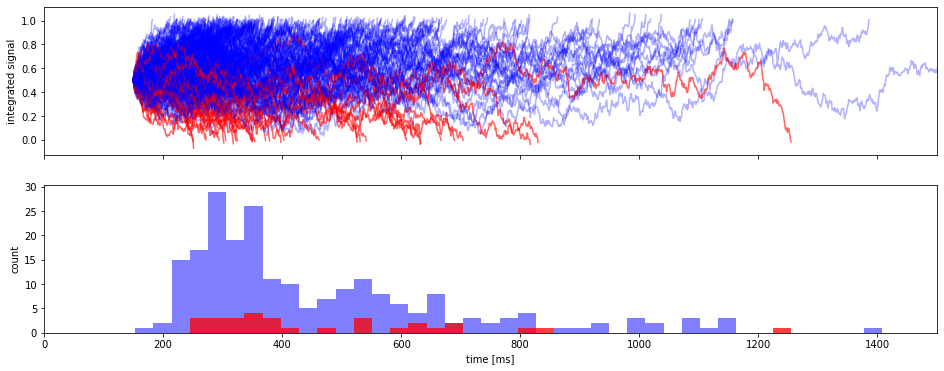

In [ ]:
# first, some parameters that give us reasonable behavior
a = 1
z = a/2
t = 150
v = 0.00125 
vs = 0.025

n_trials = 250

# set up the figures
f, ss = plt.subplots(2,1, figsize=(16,6), sharex=True)
ss[0].set_xlim([0,1500])
ss[1].set_xlim([0,1500])
ss[1].set_xlabel('time [ms]')
ss[0].set_ylabel('integrated signal')
ss[1].set_ylabel('count')

# simulate a bunch of trials
trials = []
for x in range(n_trials):
    trial = DDM_trial(v=v, vs=vs, z=z, t=t, a=a, full_return=True)
    if trial['answer'] == 0:
        ss[0].plot(np.arange(len(trial['trajectory']))+t, trial['trajectory'], alpha=0.3, c='b')
    else:
        ss[0].plot(np.arange(len(trial['trajectory']))+t, trial['trajectory'], alpha=0.6, c='r')  
    trials.append({'answer': trial['answer'], 'rt': trial['rt']}) 

# we now convert the trials list to a dataframe, for easy and unambiguous indexing.
trials = pd.DataFrame(trials)

ss[1].hist(trials[trials['answer']==0]['rt'], alpha=0.5, color='b', bins=np.linspace(0,1500,50))
ss[1].hist(trials[trials['answer']==1]['rt'], alpha=0.75, color='r', bins=np.linspace(0,1500,50));

Text(0.5, 0, 'time [ms]')

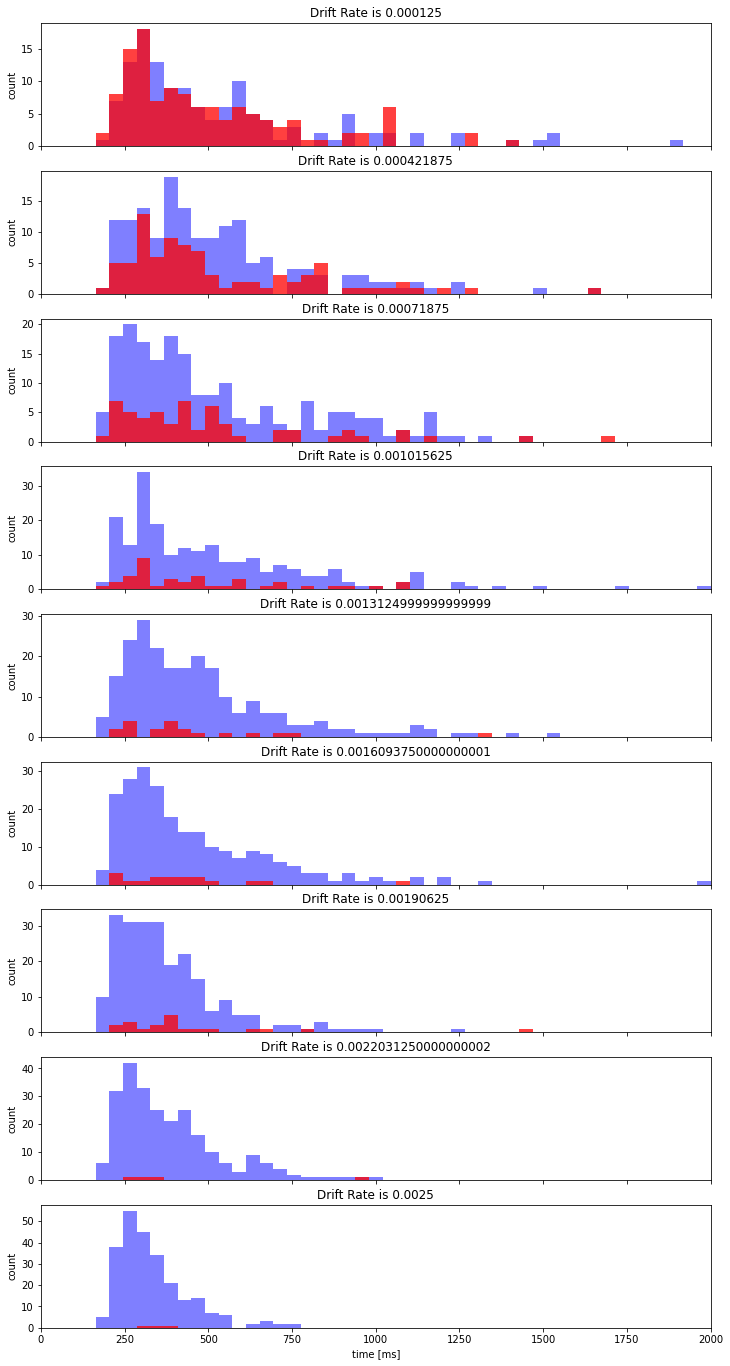

In [ ]:
different_vs = np.linspace(0.000125, 0.0025, 9)

basic_trials = [pd.DataFrame([DDM_trial(v=v, vs=vs, z=z, t=t, a=a, full_return=False) 
                             for x in range(n_trials)]) for v in different_vs]

f, ss = plt.subplots(len(different_vs),1, figsize=(12,24), sharex=True)
for splt in range(len(different_vs)):
    ss[splt].set_xlim([0,2000])
    ss[splt].hist(basic_trials[splt][basic_trials[splt]['answer']==0]['rt'], alpha=0.5, color='b', bins=np.linspace(0,2000,50))
    ss[splt].hist(basic_trials[splt][basic_trials[splt]['answer']==1]['rt'], alpha=0.75, color='r', bins=np.linspace(0,2000,50))
    ss[splt].set_ylabel('count');
    ss[splt].set_title('Drift Rate is ' +str(different_vs[splt]));
ss[-1].set_xlabel('time [ms]')

## Questions on Drift Diffusion Model

**As above:** Answer these questions using separate code or markdown cells, depending on the question. If you want to explain yourself (or answer the questions using text), use a markdown cell for this. 

1. In the above example, we manipulated the drift rate parameter $v$. With which SDT measure, as quantified in the previous section, does this correspond?

    **Answer:** <!-- the separation between signal and noise, i.e. $d'$-->

2. With what parameter in the DDM does the other main SDT parameter correspond?

    **Answer:** <!-- criterion, i.e. $c$, corresponds to the bias before the drift begins, or $z$ -->


3. What happens with the reaction times of the error trials in the above simulation? And for the correct trials? Did you expect this? What does this tell you about the interpretation of average reaction times?

    **Answer:** <!-- They both become faster, but I'd expected that errors would become slower because you become worse at the task. We cannot interpret these raw measures blindly, but need models to interpret these types of results.    -->

4. Now, change that other parameter (the answer to question 2) in the same parametric way as the Drift Rate was changed above - do so in a new code block. What do you see happening, and why? Try to draw the link with the SDT trial categories.

    **Answer:** <!--see below. This changes the ratios of hits and false alarms. (we're looking only at signal trials). Errors are faster when downward bias is strong $(z << 0.5)$. Correct RTs are faster when upward bias is strong $(z >> 0.5)$. -->

5. In the present implementation, we used time in ms. What effect would changing the simulations to occur in seconds have on the parameters $v$ and $z$ in the model? Would they need to change, and if so, how?

    **Answer:** <!-- This would mean we scale everything that depends on time, and what we see is that all parameters are related. If we understand the units in which the model is specified, we can understand much better what each of the parameters means. -->

# Part 3: Q-learning and Maximum Likelihood estimation

Here, we will explore the inner workings of the Q-learning model, as it is used in cognitive neuroscience. Using this model, we will also try out things like grid-search and minimizer-based fitting. 

The Q-learning model (and the experiments inspired by it) has allowed researchers to relate specific abstract (latent) components of the learning and decision-making processes to specific brain mechanisms. In the exapmle in the lecture we saw that specific parameters were changed as a results of Parkinson's disease, and that only one of these parameters turned out to be influenced by dopaminergic medication - the other was affected by disease status but influenced not by medication. These separate factors could then be related to Blood Oxygenation Level Dependent (BOLD) signals measured using fMRI. This type of research, and the deep insight we gain from it, is made possible by the use of **Neural Models of Cognitive Processes**!

This practical has more supporting code than the previous practical. Feel free to browse around in the code, but it's not necessary to understand all of it. I just left it in the notebook for your perusal. The supporting code encapsulates the simulations of an experiment and the Q-learning behavior evoked by the experiment in the class **`Simulate_QLearn`**. Furthermore, we provide a function that returns the negative log-likelihood of a dataset given a specific set of model parameters (**`RL_train_NLL`**).



In [ ]:
# making sure imports are in place
import math
import scipy as sp
import scipy.stats as stats 
import numpy as np
import matplotlib 
import matplotlib.pylab as plt
import pandas as pd
import itertools as it
import scipy.optimize as op

In [ ]:
class Simulate_QLearn(object): 
    """Simulate choice data using Q-learning algorithm(s) """ 
    
    def __init__(self, beta, alphaG, alphaL, epsilon=1e-6, tau=0):

        #Original Q-learning model with two learning rates and inverse temp param
        self.beta   = beta
        self.alphaG = alphaG
        self.alphaL = alphaL
        # parameters that are in the model but not to be fitted here...
        self.epsilon= epsilon  # forgetting rate
        self.tau = tau            # discounting rate

    def generate_experiment(self, run_count=3, n_reps_per_run=20): 
        """generate an experimental set of trials to use in simulate_RL_train """
        
        runs=[]

        ##### SIMULATE TRIALS #####
        # make simulation trials of choice options and reward -->6 runs of 60 trials 
        good = np.repeat([0,2,4], n_reps_per_run) #80,70,60
        bad  = np.repeat([1,3,5], n_reps_per_run) #20,30,40

        # good and bad choice reward probabilities --> reward=0, no reward=1
        good_prob = list(zip([16,14,12], [4,6,8]))
        r_g = np.concatenate([np.concatenate([np.zeros(good_prob[x][0]),
                                np.ones(good_prob[x][1])]) for x in range(len(good_prob))])
        r_b = 1-r_g 

        # simulated trial types per run 
        run = pd.DataFrame(np.array([good, bad, r_g, r_b]).T, columns=['good','bad', 'r_g', 'r_b'])
            
        # shuffle and append runs 
        
        for i in range(run_count):
            runs.append(run.sample(frac=1).reset_index(drop=True))
        
        # merge runs to one simulated session
        self.sim_session = pd.concat(runs, ignore_index=True)

    def simulate_RL_train(self): 
        """ simulate choices using the original Q-learning algorithm """
        
        if not hasattr(self, 'sim_session'): # need to generate trials
            self.generate_experiment()
            
        data = self.sim_session

        #####  VARIABLES #####
        choices = np.array(data['good']).astype(int)
        reward = data[['r_g', 'r_b']].astype(int) # 0=reward, 1=noreward
        
        prQ = np.repeat(0.5,6)
        correct = np.zeros(choices.shape[0]).astype(int)
        selection = np.zeros(choices.shape[0])
        q_chosen_sim = np.zeros(choices.shape[0])
        q_unchosen_sim = np.zeros(choices.shape[0])
        rpe_sim = np.zeros(choices.shape[0])
        r=np.zeros(choices.shape[0])
        all_Qvalues = np.zeros((6, choices.shape[0]))
        QChoices = np.zeros((len(choices),2))  

        #-----------------------------------------------------------------------#
        # 				Simulate choices and choice probabilities 				#
        #-----------------------------------------------------------------------#

        for tr in range(choices.shape[0]): 

            #Qvalues stimulus pair
            QChoice = [prQ[choices[tr]], prQ[choices[tr]+1]] 
            QChoices[tr]=QChoice
                    
            #Choice probabilities stimulus pair
            pChoice = 1/(1+np.exp(self.beta*(QChoice[1]-QChoice[0])))
            pChoice = np.array([pChoice, 1-pChoice]) 									
            pChoice = self.epsilon/2+(1-self.epsilon)*pChoice 

            #simulate choices based on stim choice probabilities 
            if tr == 0: 
                correct[tr] = np.random.multinomial(1, [0.5,0.5])[0]
            else: 
                correct[tr] = np.random.multinomial(1, pChoice)[0]

            #the simulated choice given the model; 0 is correct choice 
            simChoice=1-correct[tr] 

            #choice prob. given the model
            selection[tr]=pChoice[simChoice]
            
            #the q-value of the simulated chosen and unchosen stimulus, before updating
            q_chosen_sim[tr]=prQ[choices[tr]+simChoice]
            q_unchosen_sim[tr]=prQ[choices[tr]+1-simChoice]

            #positive learning rate
            if (simChoice==0 and reward['r_g'][tr]==0) or (simChoice==1 and reward['r_b'][tr]==0): 
                alpha = self.alphaG
            #negative learning rate 
            elif (simChoice==0 and reward['r_g'][tr]==1) or (simChoice==1 and reward['r_b'][tr]==1):
                alpha = self.alphaL
            else: 
                print('wrong reinforcement')

            #reinforcement associated with simChoice  
            if simChoice == 0: 
                r[tr]=1-reward['r_g'][tr] #r=1, reward
            else: 
                r[tr]=1-reward['r_b'][tr] #r=0, no reward

            #calculate simulated rpe 
            rpe_sim[tr] = r[tr]-prQ[choices[tr]+simChoice]

            #update stimulus Q-value 
            prQ[choices[tr]+simChoice] = prQ[choices[tr]+simChoice] \
                                            + alpha*(r[tr]-prQ[choices[tr]+simChoice])

            #decay values to initial value 
            prQ = prQ + self.tau * (0.5-prQ)
            all_Qvalues[:,tr]=prQ		
        
        #simulated results, correct simulated choice=1/incorrect=0; rewarded simulated choice=1/noreward=0
        sim_results = pd.DataFrame(np.array([choices, correct, r, selection, q_chosen_sim, 
            q_unchosen_sim, rpe_sim, QChoices[:,0]-QChoices[:,1]]).T, 
            columns=['stim_pair', 'correct_sim','reward_sim', 'select_prob_sim', 'q_chosen_sim', 
            'q_unchosen_sim', 'rpe_sim', 'qdiff_sim'])
        sim_Qvals = pd.DataFrame(np.array(all_Qvalues.T), 
            columns=['sA','sB','sC','sD','sE','sF'])
        self.sim_results = pd.concat([sim_results, sim_Qvals], axis=1)
    
    def plot_simulation(self, data_types=['qdiff_sim', 'rpe_sim'], pairs=[0,2,4], new=False):
        """
        plot the simulated timecourses of `data_types` of a full experiment, for the given pairs. 
        """
        if not hasattr(self, 'sim_results') or new:
            self.generate_experiment()
            self.simulate_RL_train()
        to_be_plotted = [self.sim_results[data_types][self.sim_results['stim_pair']==x] for x in pairs]
        f, ss = plt.subplots(1, len(pairs), figsize=(len(pairs)*6,4), sharey=True)
        ss[0].set_ylabel('Difference in Q-value between choice options\n&\nReward prediction error')
        for i, tbp in enumerate(to_be_plotted):
            tbp.plot(ax=ss[i])
            ss[i].set_title('pair ' + str(pairs[i]))
            ss[i].set_xlabel('trial #')
                            
    def plot_decision_function(self, f=False, line='r:', label=''):
        if not f:
            f = plt.figure()
        plt.plot(np.linspace(-1,1,100), 1/(1+np.exp(self.beta*(np.linspace(-1,1,100)))), line, label=label)
        plt.ylabel('p(incorrect)')
        plt.xlabel('$\Delta$ value between chosen and not-chosen stimulus')
        plt.axvline(0, lw=0.5, color='k')
        

def RL_train_NLL(theta, data): 
    """ Returns the negative log likelihood of the data given the values of theta.
    In this implementation, we fit beta, alpha gain and alpha loss, but not the forgetting and discounting rates."""	

    #parameters to fit
    beta = theta[0] * 100       # inverse gain recoded to [0-100]
    alphaG = theta[1]           # learning rate gain
    alphaL = theta[2]           # learning rate loss
    epsilon = 1e-5 			    # forgetting rate
    tau = 0 					# discounting	

    choices = np.array(data['stim_pair']).astype(int)       #recode into 0,2,4 integers - used for indexing	
    correct = 1-np.copy(data['correct_sim']).astype(int)    #0=correct,1=incorrect -> recoded/reversed to be able to fit. 
    reward = 1-np.copy(data['reward_sim']).astype(int)      #0=reward,1=noreward -> recoded/reversed to be able to fit.

    #start Q-values
    prQ0 = np.repeat(0.5,6) 
    prQ = prQ0

    #initialise Qvalue, probs & prediction error arrays
    QChoices = np.zeros((len(choices),2))  
    selection = np.zeros(len(choices))

    #loop over trials
    for tr in range(choices.shape[0]): 

        #calculate choice prob using soft max
        QChoice = [prQ[choices[tr]], prQ[choices[tr]+1]] 	#Qvalues of stimulus pair
        QChoices[tr]=QChoice

        pChoice = 1/(1+np.exp(beta*(QChoice[1]-QChoice[0])))
        pChoice = np.array([pChoice, 1-pChoice]) 									
        pChoice = epsilon/2+(1-epsilon)*pChoice 	#choice probs of stimulus pair

        selection[tr] = pChoice[correct[tr]]  	    #probability of the chosen stimulus

        #select correct learning rate
        if reward[tr] == 0: 
            alpha = alphaG
        elif reward[tr]==1: 
            alpha = alphaL

        #update stimulus Q-value
        r=1-reward[tr] #1 or 0 			
        
        # update
        prQ[choices[tr]+correct[tr]] = prQ[choices[tr]+correct[tr]] \
                                    + alpha*(r-prQ[choices[tr]+correct[tr]])

        #decay Q-values toward initial value
        prQ=prQ+tau*(0.5-prQ)

    #log likelihood 
    loglik = sum(np.log(selection)) 

    #correct for funny values
    if math.isnan(loglik): 
        loglik = -1e15  
        print('LLH is nan')
    if loglik == float("inf"):
        loglik = 1e15   
        print('LLH is inf')

    return -loglik

# Simulation of an experiment


The cells below exemplify how to simulate an experiment and the associated choices and learning given specific values of the explore/expoit and positive/negative learning rate parameters. 

***NOTE:*** We'll be simulating experiments all the time, so you can always go back to these plots, if you want to see what actual behavior did during the experiment.

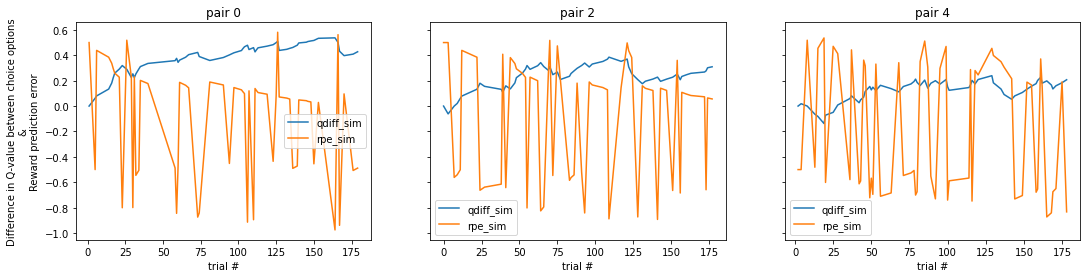

In [ ]:
# first, what are my parameters?
beta_sim = 2.4
ag_sim = 0.123
al_sim = 0.037

sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
sql.plot_simulation()

Damn, that was easy! A whole synthetic experiment, just like that! 

The `sql.sim_results` variable (a pandas `DataFrame`) contains all of the information about the simulation. Feel free to explore what's in there by looking inside (just run `sql.sim_results` in a code cell, you'll see the entire table).  

### Question 1: 
Try to run it a couple of times with the same parameters settings - describe what aspects of the experiment change, and which don't. 

**HINT:** In the lecture, I explained that each parameter setting of the model maps onto a probability distribution over datasets. How does what you're seeing here relate to that statement?

**Answer:** <!--The specific implementation of the trial sequence changes, but globally the patterns remain the same. For example, the differences between the three pairs are similar for all simulations: pair 0 ends up with the highest qdiff_sim values, and the pair 4 with the lowest. The RPEs also show a similar evolution across simulations, with the decreases of RPEs strongest for pair 0, and less so for pair 4. It's interesting to see that the negative prediction errors for pair 0 are also stronger (more negative) for the pair 0 - a sign that the expectations of value are highest there due to more learning. -->

### Question 2: 
Try to change the parameters a bit - describe what happens for changes up and down for each of the parameters. Oh, and look how easy it is to make nice symbols in markdown cells!

- $\alpha_{gain}:$ <!--We know that this is the positive learning rate - the learning rate for positive feedback. We can confirm this in the graphsefrom the fact that that increasing $\alpha_{gain}$ while keeping the other parameters the same, learning speeds up (the blue lines reach their asymptote earlier). -->
- $\alpha_{loss}:$ <!-- Negative learning rate; increasing this while keeping the others constant makes the model 'unlearn' the Q values quickly. The asymptotes in Q values go down, and become more jagged. -->
- $\beta:$ <!-- The decision function slope parameters. Lowering this value makes the decision function become more shallow. This means more *exploratory* choices, and thus a more erratic learning evolution. -->

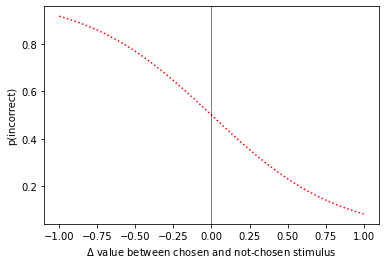

In [ ]:
# there's a little function that plots the decision-making function used in the simulation.
sql.plot_decision_function()


### Question 3: 

Let's use this plotting function to explore what different values of $\beta$ do. Change the code in the cell below to explore this. Try to relate the results to your answer in **Question 2**.

**Answer:** <!--Like stated above, we change the slope of the decision function. If the value is low, there are more 'random' decisions - i.e. against the model's better judgment. -->

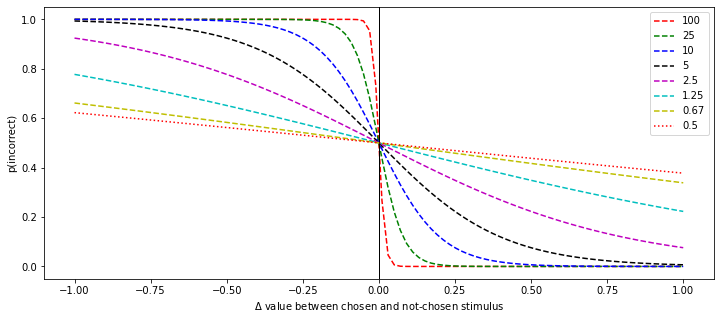

In [ ]:
beta_values = [100, 25, 10, 5, 2.5, 1.25, 0.67, 0.5]
linestyles = ['r--', 'g--', 'b--', 'k--', 'm--', 'c--', 'y--', 'r:', 'g:', 'b:', 'k:', 'm:', 'c:', 'y:'] 

f = plt.figure(figsize=(12,5))
for beta, linestyle in zip(beta_values, linestyles):
    sql = Simulate_QLearn(beta=beta, alphaG=0, alphaL=0)
    sql.plot_decision_function(f=f, line=linestyle, label=str(beta))
plt.legend();

# Likelihood (or rather, negative log-likelihood)

We also have a function (**`RL_train_NLL`**) to return the negative log-likelihood of the model given a (simulated or real) dataset. 

Let's try that out. 

### Please note 

In the simulations, $\beta$ ranges from 0 to >100, because of how it's defined in the equations. But, for the NLL function and the fitting, we'll scale beta to remain in the $[0,1]$ range by dividing it by 100. This is because the fitting procedure will then be able to take similar steps in the $\beta$, $\alpha_{gain}$ and $\alpha_{loss}$ parameter spaces. 


In [ ]:
# first, what are my parameters?
beta_sim = 22.4
ag_sim = 0.23
al_sim = 0.123

sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
# if we're not plotting, we'll need to run the stimulation ourselves.
sql.simulate_RL_train()

# But, what's the negative log-likelihood of this data given a few parameters?

##########################################################################################################
###
### See the note on beta scaling above
###
##########################################################################################################

beta_test = 0.05
ag_test = 0.3
al_test = 0.04

nll = RL_train_NLL(theta=[beta_test, ag_test, al_test], data=sql.sim_results)

print(f'Negative log-likelihood is {nll}')

Negative log-likelihood is 45.80618591071885


### Question 4:

Try to vary the parameters around, but keep the dataset the same - this means you shouldn't run the simulation again! So, use a separate (new code cell).

What happens when the test parameters come closer to the simulation parameters? And when they move away from the simulation parameters?

**Answer:** <!-- The NLL values decrease when we go towards the initially used values - this can be used to fit the parameters of course.-->

In [ ]:
# code cell
beta_test = 0.75
ag_test = 0.43
al_test = 0.04

nll = RL_train_NLL(theta=[beta_test, ag_test, al_test], data=sql.sim_results)

print(f'Negative log-likelihood is {nll}')
beta_test = 0.025
ag_test = 0.23
al_test = 0.4

nll = RL_train_NLL(theta=[beta_test, ag_test, al_test], data=sql.sim_results)

print(f'Negative log-likelihood is {nll}')
beta_test = 0.25
ag_test = 0.23
al_test = 0.04

nll = RL_train_NLL(theta=[beta_test, ag_test, al_test], data=sql.sim_results)

print(f'Negative log-likelihood is {nll}')

Negative log-likelihood is 60.13817267516965
Negative log-likelihood is 87.56302275626831
Negative log-likelihood is 46.507541870482896


### Question 5:

Well, that's all nice and good but that's not fitting anything, its it? Let's get the computer to do the work for us. 

First, we'll try a **grid search** in a 2D parameter plane, across the alphas. ***Your assignment:*** Plot the likelihood landscape for three different simulated experiments, for different parameters. Use the title of the plot to make it clear what plot belongs to what simulation. 

## BONUS:

In **Question 5** I'm fixing $\beta$, but you could also fix one of the alphas. This will force you to think about the range of beta so be sure you understand the note above.... 

So, the assignment is to write code that creates and plots a likelhood landscape across $\beta$ and some $\alpha$ of your choosing, and use it for the data that came from your third simulation of **Question 5**. Make sure you label the plot correctly!

Remember, this is a BONUS question for a reason! First do the further questions...


**Answers hidden in answer markdown cells below -- try you own answer first!**

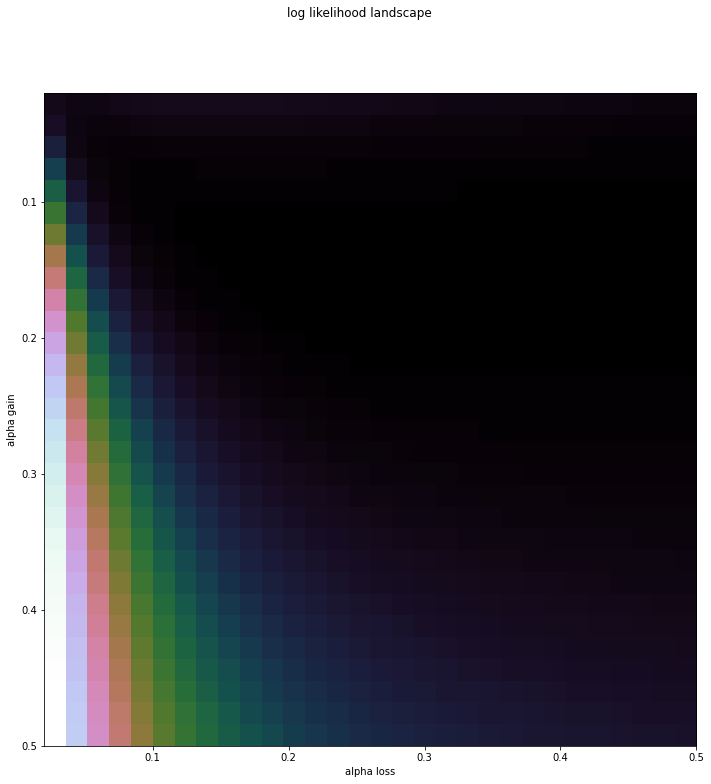

In [ ]:
# we're still working with the same data. 

n_grid_steps = 30
fixed_beta = 0.2
alpha_range = np.linspace(0.02, 0.5, n_grid_steps)

ag, al = np.meshgrid(alpha_range, alpha_range) # you can always look up what np.meshgrid does...

# let's for loop across the calculations
nlls = np.zeros((n_grid_steps, n_grid_steps))
for x in range(n_grid_steps):
    for y in range(n_grid_steps):
        # pick the parameters for this specific NLL calculation
        theta = [fixed_beta, ag[x,y], al[x,y]]
        nlls[x,y] = RL_train_NLL(theta=theta, data=sql.sim_results)
        
# and plot the result - as log likelihood in this case. 
f = plt.figure(figsize=(12,12))
plt.imshow(nlls, 
           cmap='cubehelix', 
           aspect='equal', 
           extent=[alpha_range[0], alpha_range[-1], alpha_range[-1], alpha_range[0]])
f.suptitle('log likelihood landscape')
f.gca().set_ylabel('alpha gain')
f.gca().set_xlabel('alpha loss');

ANSWER QUESTION 5
<!-- 
```


#############################################################
### ANSWER QUESTION 5
#############################################################


# three simulations
simulations = []
for beta_sim, ag_sim, al_sim in zip([52, 21, 2.4], [0.1, 0.4, 0.6], [0.02, 0.12, 0.1]):
    sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
    sql.simulate_RL_train()
    simulations.append(sql)

n_grid_steps = 30
fixed_beta = 0.2
alpha_range = np.linspace(0.02, 0.5, n_grid_steps)

ag, al = np.meshgrid(alpha_range, alpha_range) # you can always look up what np.meshgrid does...


for sql in simulations:
    # let's for loop across the calculations
    nlls = np.zeros((n_grid_steps, n_grid_steps))
    for x in range(n_grid_steps):
        for y in range(n_grid_steps):
            # pick the parameters for this specific NLL calculation
            theta = [fixed_beta, ag[x,y], al[x,y]]
            nlls[x,y] = RL_train_NLL(theta=theta, data=sql.sim_results)

    # and plot the result - as log likelihood in this case. 
    f = plt.figure(figsize=(12,12))
    plt.imshow(nlls, 
               cmap='cubehelix', 
               aspect='equal', 
               extent=[alpha_range[0], alpha_range[-1], alpha_range[-1], alpha_range[0]])
    f.suptitle(f"log likelihood landscape for simulation beta: {sql.beta}, alpha_g: {sql.alphaG}, alpha_l: {sql.alphaL}")
    f.gca().set_ylabel('alpha gain')
    f.gca().set_xlabel('alpha loss');
```


-->

ANSWER BONUS QUESTION:
<!--
```
#############################################################
### ANSWER BONUS QUESTION
#############################################################

ag_fixed = 0.2
beta_grid, alpha_L_grid = np.meshgrid(np.linspace(0.01, 0.5, n_grid_steps), np.linspace(0.01, 0.5, n_grid_steps))

nlls = np.zeros((n_grid_steps, n_grid_steps))
for x in range(n_grid_steps):
    for y in range(n_grid_steps):
        # pick the parameters for this specific NLL calculation
        theta = [beta_grid[x,y], ag_fixed, al[x,y]]
        nlls[x,y] = RL_train_NLL(theta=theta, data=sql.sim_results)

# and plot the result - as log likelihood in this case. 
f = plt.figure(figsize=(12,12))
plt.imshow(nlls, 
           cmap='cubehelix', 
           aspect='equal', 
           extent=[alpha_range[0], alpha_range[-1], alpha_range[-1], alpha_range[0]])
f.suptitle(f"log likelihood landscape for simulation beta: {sql.beta/100}, alpha_g: {sql.alphaG}, alpha_l: {sql.alphaL}")
f.gca().set_ylabel('beta')
f.gca().set_xlabel('alpha loss');
```
-->

# Fitting the Q-learning model

It's good that we have the tools to investigate the parameter landscape of your model. But if we have data, we can also have the computer find the minimum itself. Let's try that out.  

We'll

1. simulate an experiment with a random set of parameters
2. fit the model using `scipy`'s `minimize` functionality

Check the correspondence between the two. 

In [ ]:
# create random parameters
beta_sim, ag_sim, al_sim = np.random.rand()*40, np.random.rand()*0.4, np.random.rand()*0.4
# simulate model
sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
# if we're not plotting, we'll need to run the stimulation ourselves.
sql.simulate_RL_train()

fit_result = op.minimize(fun=RL_train_NLL, 
            x0=(0.2, 0.2, 0.2), 
            method='SLSQP',# 'CG',#'L-BFGS-B', 
            args=(sql.sim_results, ), 
            bounds= ((1e-6,10), (1e-6,1), (1e-6,1),))
print(fit_result)

beta_fit, ag_fit, al_fit = fit_result['x']

print(f"beta_sim:{beta_sim} vs beta_fit:{beta_fit*100}")
print(f"ag_sim:{ag_sim} vs ag_fit:{ag_fit}")
print(f"al_sim:{al_sim} vs al_fit:{al_fit}")

     fun: 47.74846168194951
     jac: array([ 0.00511694, -0.00253534, -0.00385904])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.07282004, 0.36115069, 0.31981213])
beta_sim:7.087710766051041 vs beta_fit:7.282004407254887
ag_sim:0.3287646619494813 vs ag_fit:0.3611506859454337
al_sim:0.2513820420182513 vs al_fit:0.31981213263181435


### Question 6:

Run the above code a couple of times. Explain what you see. Is the fit perfect?

Change the code (in separate cells, of course - and with comments and markdown explanations where necessary) to try to:

- Fit the same simulation twice: Are the results the same?
- Simulate the experiment again, but with the same parameters. Then, re-fit. Are the results the same?

Interpret these results.

In [ ]:

print("FIRST FIT RESULT:")
fit_result = op.minimize(fun=RL_train_NLL, 
            x0=(0.2, 0.2, 0.2), 
            method='SLSQP',# 'CG',#'L-BFGS-B', 
            args=(sql.sim_results, ), 
            bounds= ((1e-6,10), (1e-6,1), (1e-6,1),))
print(fit_result)

beta_fit, ag_fit, al_fit = fit_result['x']

print(f"beta_sim:{beta_sim} vs beta_fit:{beta_fit*100}")
print(f"ag_sim:{ag_sim} vs ag_fit:{ag_fit}")
print(f"al_sim:{al_sim} vs al_fit:{al_fit}")

print("SECOND FIT RESULT:")
fit_result = op.minimize(fun=RL_train_NLL, 
            x0=(0.2, 0.2, 0.2), 
            method='SLSQP',# 'CG',#'L-BFGS-B', 
            args=(sql.sim_results, ), 
            bounds= ((1e-6,10), (1e-6,1), (1e-6,1),))
print(fit_result)

beta_fit, ag_fit, al_fit = fit_result['x']

print(f"beta_sim:{beta_sim} vs beta_fit:{beta_fit*100}")
print(f"ag_sim:{ag_sim} vs ag_fit:{ag_fit}")
print(f"al_sim:{al_sim} vs al_fit:{al_fit}")

FIRST FIT RESULT:
     fun: 47.74846168194951
     jac: array([ 0.00511694, -0.00253534, -0.00385904])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.07282004, 0.36115069, 0.31981213])
beta_sim:7.087710766051041 vs beta_fit:7.282004407254887
ag_sim:0.3287646619494813 vs ag_fit:0.3611506859454337
al_sim:0.2513820420182513 vs al_fit:0.31981213263181435
SECOND FIT RESULT:
     fun: 47.74846168194951
     jac: array([ 0.00511694, -0.00253534, -0.00385904])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.07282004, 0.36115069, 0.31981213])
beta_sim:7.087710766051041 vs beta_fit:7.282004407254887
ag_sim:0.3287646619494813 vs ag_fit:0.3611506859454337
al_sim:0.2513820420182513 vs al_fit:0.31981213263181435


**Answer:** <!--yes, the two fits on the same data are the same. The fitting routine we use here is a deterministic one. 
-->


In [ ]:
sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
# if we're not plotting, we'll need to run the stimulation ourselves.
sql.simulate_RL_train()

fit_result = op.minimize(fun=RL_train_NLL, 
            x0=(0.2, 0.2, 0.2), 
            method='SLSQP',# 'CG',#'L-BFGS-B', 
            args=(sql.sim_results, ), 
            bounds= ((1e-6,10), (1e-6,1), (1e-6,1),))
print(fit_result)

beta_fit, ag_fit, al_fit = fit_result['x']

print(f"beta_sim:{beta_sim} vs beta_fit:{beta_fit*100}")
print(f"ag_sim:{ag_sim} vs ag_fit:{ag_fit}")
print(f"al_sim:{al_sim} vs al_fit:{al_fit}")

     fun: 61.19417885849008
     jac: array([0.00478363, 0.00056648, 0.00479889])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.06362256, 0.35376753, 0.17025794])
beta_sim:7.087710766051041 vs beta_fit:6.362256392923799
ag_sim:0.3287646619494813 vs ag_fit:0.3537675306584866
al_sim:0.2513820420182513 vs al_fit:0.17025794435147834


**Answer:** 

<!--
No, here they are different. The fit results turn out to be very dependent on the specific data, and different simulations generate different datasets. .

-->


# Parameter recovery.

How do we even know whether our fits will deliver sensible results? It could be that for certain parameter combinations, it becomes impossible to retrieve parameters correctly. Parameter recovery was explained in the lecture, so we'll follow that recipe.
We'll 

- do the following a 100 times:
    1. simulate an experiment
    2. fit the model using `scipy`'s `minimize` functionality
    3. save the results

Then, we'll check the correspondence between the simulated inputs and fitted outputs. 

In [ ]:
sims = []
for x in range(100):
    beta_sim, ag_sim, al_sim = np.random.rand()*40, np.random.rand()*0.4, np.random.rand()*0.4
    sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
    # sql.plot_simulation()
    # sql.plot_decision_function()
#     sql.generate_experiment()
    sql.simulate_RL_train()

    beta, alphaG, alphaL = op.minimize(fun=RL_train_NLL, 
                x0=(0.2, 0.2, 0.2), 
                method='L-BFGS-B', 
                args=(sql.sim_results, ), 
                bounds= ((1e-6,10), (1e-6,1), (1e-6,1),))['x']

    sims.append([beta_sim, ag_sim, al_sim, beta, alphaG, alphaL])
sims = np.array(sims)

In [ ]:
f, ss = plt.subplots(1, 3, figsize=(16,6), sharex=True, sharey=True)
ss[0].plot(sims[:,0]/100, sims[:,3], 'ko', label='beta')
ss[0].legend()
ss[1].plot(sims[:,1], sims[:,4], 'go', label='alpha gain')
ss[1].legend()
ss[2].plot(sims[:,2], sims[:,5], 'ro', label='alpha loss')
ss[2].set_ylim([0,0.5]);
ss[2].legend()

### Question 7:

- How could you see whether you can recover the parameters in the above plot?
- Inspect the bounds of the fitting routing. I sneakily changed the limits of the plot. Comment the line that limits the y scale, and re-plot the parameter recovery plots. What do you see? Is there any sign of instability?
- Right now, we're using a *HUGE* range for the parameters. What happens when you limit the simulations to a more narrow set of ranges, say:

$\beta: [0.5,10]$

$\alpha_{gain}: [0.05,0.25]$

$\alpha_{loss}: [0.0125,0.15]$    
    
Are the parameters stable now? What does this mean about the importance of knowing what your parameters mean?


**Answer:**
<!-- 

- Can we recover the parameters? Well, **yes** and **no**. 

    Re **yes:** There is a broad correspondence between the different parameters, so we can retrieve some of the information in there. 

    Re **no:** There is also a very large spread across between simulated and fitted parameters, which means that we are not so sensitive. 

- The bounds are very broad, so that $\beta$ can go up very very far. These outliers are actuallly in the plot, as we can see once we comment the `set_ylim` line. It turns out that the beta parameter can explode. If we look back to our decision function plots up in the notebook, this is clear from the fact that the decision function's shape doesnt' change that much anymore once we go above ~50 or so. This means that this parameter becomes a bit unstable and we should be aware of this when fitting our model.

- **See below. **

    One could argue that things look a bit better. Especially for $\beta$, this action, of limiting the regime of possible settings to a sensible region, has helped a lot for the stability of our simulations, and recoverability of our parameters. **NOTE:** Here, we have varied all three parameters independently. This means that we may be pushing the model outside of reasonable bounds because of random combinations of parameters. This is something we should take note of. We need to always understand what ranges are sensible for our parameters.  -->

In [ ]:
sims = []
for x in range(100):
    beta_sim, ag_sim, al_sim = 0.5 + np.random.rand()*9.5, 0.05 + np.random.rand()*0.2, 0.0125 + np.random.rand()*0.1375
    sql = Simulate_QLearn(beta=beta_sim, alphaG=ag_sim, alphaL=al_sim)
    # sql.plot_simulation()
    # sql.plot_decision_function()
#     sql.generate_experiment()
    sql.simulate_RL_train()

    beta, alphaG, alphaL = op.minimize(fun=RL_train_NLL, 
                x0=(0.2, 0.2, 0.2), 
                method='L-BFGS-B', 
                args=(sql.sim_results, ), 
                bounds= ((1e-6,10), (1e-6,1), (1e-6,1),))['x']

    sims.append([beta_sim, ag_sim, al_sim, beta, alphaG, alphaL])
sims = np.array(sims)

In [ ]:
f, ss = plt.subplots(1, 3, figsize=(16,6), sharex=True, sharey=True)
ss[0].plot(sims[:,0]/100, sims[:,3], 'ko', label='beta')
ss[0].legend()
ss[1].plot(sims[:,1], sims[:,4], 'go', label='alpha gain')
ss[1].legend()
ss[2].plot(sims[:,2], sims[:,5], 'ro', label='alpha loss')
ss[2].set_ylim([0,0.3]);
ss[2].legend()